In [1]:
# Import các thư viện cần thiết
import numpy as np
import cv2
import pandas as pd
import os
import pickle
from google.colab import drive
from google.colab.patches import cv2_imshow

In [2]:
# Connect Google Drive
drive.mount('/content/drive')
path = '/content/drive/MyDrive/TGMT/'
# Hiển thị tất cả thư mục hoặc file
os.listdir(path)

Mounted at /content/drive


['image_40.jpg',
 'image_20.jpg',
 'image_400.jpg',
 'Colab Notebooks',
 'models',
 'FaceImage']

In [5]:
# Face detection model
faceDetectionModel = path + "/models/res10_300x300_ssd_iter_140000_fp16.caffemodel"

# Mô tả kiến trúc
faceDetectionProto = path + "/models/deploy.prototxt.txt"

# Mô hình mô tả khuôn mặt
faceDescriptor = path + "/models/openface.nn4.small2.v1.t7"

# Sử dụng OpenCV DNN đọc mô hìn nhận diện khuôn mặt
dectectorModel = cv2.dnn.readNetFromCaffe(faceDetectionProto, faceDetectionModel)

# Đọc mô hình mô tả khuôn mặt từ file Torch
descriptorModel = cv2.dnn.readNetFromTorch(faceDescriptor)

In [6]:
# Danh sách hình ảnh chuẩn bị
faces = path + '/FaceImage'
os.listdir(faces)

['1721031446_NguyenMinhKhanh',
 '1721031460_NguyenDoanDucNam',
 '1721031457_BuiThiCaoDuyen',
 '1721031615_VuDinhNguyen',
 '1721031591_NguyenHongNhung',
 '1721031561_NguyenDucHieu',
 '1721031618_TruongThanhLuan',
 '1721031660_LeQuangQuocDat',
 '1721031731_NguyenDongHung',
 '1721031651_NguyenHoangKyAnh',
 '1721031695_DinhDuyLong',
 '1721031620_PhanQuocHuy',
 '1721031693_HuynhMinhTien',
 '1721031324_LeVanTrong',
 '1721031416_NguyenTheHien',
 '1721031546_Tran Trung Hieu',
 '1721031558_ThaiMinhTam',
 '1721031512_LeMinhNghia',
 '1721031314_NguyenDinhHao',
 '1721031488_PhamTheToan',
 '1721031139_BaoNgocThienBao',
 '1721031129_TranAnhHao',
 '1721031236_nguyenhoangtuan',
 '1721030985-PhamNgocKhanhVinh',
 '1721031276_ThachAnhQuoc',
 '1721031291_DaoHoangNhi',
 '1721031229_NinhVanDung',
 '1721031077_PhamNguyenPhuongTheNgoc',
 '1721031293_LeBaoHongDuc',
 '1721030961_NguyenPhuocSang',
 '1721030943_DangMinhVu',
 '1721030799_NguyenNhatHieu',
 '1721030848_LeQuocKy',
 '1721030802_NguyenNhatTien',
 '1721

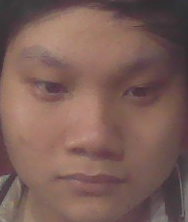

[[ 5.88069148e-02  1.76712632e-01 -2.34147515e-02  1.16463304e-01
  -6.89670295e-02  1.54205918e-01  3.59210148e-02  1.02472759e-03
   8.28471780e-03  1.37716457e-01  1.32415131e-01 -1.61576215e-02
   8.81550014e-02 -1.48985982e-01  8.59328061e-02  2.26053838e-02
   3.50488722e-02  1.04856767e-01 -5.08093573e-02  2.17745658e-02
   3.59963216e-02 -7.33151510e-02  2.55560018e-02  6.25839904e-02
   4.61712740e-02 -1.73594072e-01 -1.05556875e-01 -1.15948506e-01
  -5.63448519e-02  1.08155489e-01  4.19044010e-02  8.85722935e-02
   5.20727038e-03  1.38034329e-01 -1.88245494e-02 -2.61864886e-02
   1.14484802e-01 -1.15394043e-02  6.44274354e-02  4.09435555e-02
  -3.33404988e-02 -1.54005647e-01  4.99419346e-02 -8.40331614e-02
  -4.72530387e-02 -2.05039009e-01  7.94554874e-02 -1.21267457e-02
  -3.81033532e-02  1.32495672e-01  2.05743060e-01 -5.82333207e-02
  -1.13198414e-01  6.11309670e-02 -3.66324000e-02  4.82762381e-02
  -1.50576392e-02 -1.24844342e-01  4.29119170e-02 -4.04277304e-03
  -9.64715

In [8]:
# Trích xuất đặc trưng cho một ảnh
quang = path + '/FaceImage/1721031695_DinhDuyLong/ThuVien_5010.jpg'
img1 = cv2.imread(quang)

# Copy cái ảnh
image = img1.copy()

# Lấy chiều cao và chiều rộng của ảnh
h, w = image.shape[:2]

# Chuẩn bị dữ liệu đầu vào cho mô hình nhận diện khuôn mặt
imgBlob = cv2.dnn.blobFromImage(image, 1, (300,300), (104, 177, 123), swapRB=False, crop=False)

# Thiết lập đầu vào cho mô hình
dectectorModel.setInput(imgBlob)

# Thực hiện việc nhận diện khuôn mặt
detections = dectectorModel.forward()

# Kiểm tra xem có khuôn mặt nào hay không?
if (len(detections)>0):
  # Chọn khuôn mặt có độ tin cậy cao nhất (confidence) cao nhất
  i = np.argmax(detections[0, 0, :, 2]) # Giá trị thứ 2 trong 7 giá trị cuối cùng => confidence
  confidence = detections[0, 0, i, 2]

  # Kiểm tra độ tin cậy có lớn hơn 0.5
  if (confidence>0.5):
      # Tính toán hộp bao quanh khuôn mặt
      box = detections[0, 0, i, 3:7]* np.array([w, h, w, h])
      (startX, startY, endX, endY) =box.astype('int')

      # Trích xuất vùng ảnh chứa khuôn mặt ra
      roi = image[startY:endY, startX:endX]
      cv2_imshow(roi)

      # Chuẩn bị dữ liệu đầu vào cho mô hình trích xuất đặc trưng
      faceBlob = cv2.dnn.blobFromImage(roi, 1/255, (96,96), (0,0,0), swapRB=True, crop=True)

      # Thiết lập đầu vào cho mô hình
      descriptorModel.setInput(faceBlob)

      # Thực hiện việc trích xuất đặc trưng
      vectors = descriptorModel.forward()

      # Print vectors
      print(vectors)

In [9]:
# Tạo ra một functions để áp dụng cho nhiều ảnh
def myDetect(image_path):
  # Trích xuất đặc trưng cho một ảnh
  img1 = cv2.imread(image_path)

  # Copy cái ảnh
  image = img1.copy()

  # Lấy chiều cao và chiều rộng của ảnh
  h, w = image.shape[:2]

  # Chuẩn bị dữ liệu đầu vào cho mô hình nhận diện khuôn mặt
  imgBlob = cv2.dnn.blobFromImage(image, 1, (300,300), (104, 177, 123), swapRB=False, crop=False)

  # Thiết lập đầu vào cho mô hình
  dectectorModel.setInput(imgBlob)

  # Thực hiện việc nhận diện khuôn mặt
  detections = dectectorModel.forward()

  # Kiểm tra xem có khuôn mặt nào hay không?
  if (len(detections)>0):
    # Chọn khuôn mặt có độ tin cậy cao nhất (confidence) cao nhất
    i = np.argmax(detections[0, 0, :, 2]) # Giá trị thứ 2 trong 7 giá trị cuối cùng => confidence
    confidence = detections[0, 0, i, 2]

    # Kiểm tra độ tin cậy có lớn hơn 0.5
    if (confidence>0.5):
        # Tính toán hộp bao quanh khuôn mặt
        box = detections[0, 0, i, 3:7]* np.array([w, h, w, h])
        (startX, startY, endX, endY) =box.astype('int')

        # Trích xuất vùng ảnh chứa khuôn mặt ra
        roi = image[startY:endY, startX:endX]
        # cv2_imshow(roi)

        # Chuẩn bị dữ liệu đầu vào cho mô hình trích xuất đặc trưng
        faceBlob = cv2.dnn.blobFromImage(roi, 1/255, (96,96), (0,0,0), swapRB=True, crop=True)

        # Thiết lập đầu vào cho mô hình
        descriptorModel.setInput(faceBlob)

        # Thực hiện việc trích xuất đặc trưng
        vectors = descriptorModel.forward()

        # Print vectors
        return vectors

In [10]:
# Apply for all images
# Khởi tạo một dictionary
data = dict(data=[], label=[])

myDir = '/content/drive/MyDrive/TGMT/FaceImage'
folders = os.listdir(myDir)

# Duyệt qua từng thư mục
for folder in folders:
  path = myDir + "/"+folder
  print(path)

  files =  os.listdir(path)
  for fileName in files:
    try:
        # Gọi hàm trích xuất đặc trưng
        vector = myDetect(path+'/'+fileName)

        # Kiểm tra việc trích xuất đặc trưng thành công:
        if vector is not None:
          #Thêm vector đặc trưng vào trong từ điển với nhãn là tên của thư mục
          data['data'].append(vector)
          data['label'].append(folder)
          print('Trích xuất đặc trưng thành công')
    except:
      # Bỏ qua nếu gặp lỗi
      pass

/content/drive/MyDrive/TGMT/FaceImage/1721031446_NguyenMinhKhanh
Trích xuất đặc trưng thành công
Trích xuất đặc trưng thành công
Trích xuất đặc trưng thành công
Trích xuất đặc trưng thành công
Trích xuất đặc trưng thành công
Trích xuất đặc trưng thành công
Trích xuất đặc trưng thành công
Trích xuất đặc trưng thành công
Trích xuất đặc trưng thành công
Trích xuất đặc trưng thành công
Trích xuất đặc trưng thành công
Trích xuất đặc trưng thành công
Trích xuất đặc trưng thành công
Trích xuất đặc trưng thành công
Trích xuất đặc trưng thành công
Trích xuất đặc trưng thành công
Trích xuất đặc trưng thành công
Trích xuất đặc trưng thành công
Trích xuất đặc trưng thành công
Trích xuất đặc trưng thành công
Trích xuất đặc trưng thành công
Trích xuất đặc trưng thành công
Trích xuất đặc trưng thành công
Trích xuất đặc trưng thành công
Trích xuất đặc trưng thành công
Trích xuất đặc trưng thành công
Trích xuất đặc trưng thành công
Trích xuất đặc trưng thành công
Trích xuất đặc trưng thành công
Trích x

In [11]:
data.keys()

dict_keys(['data', 'label'])

In [12]:
# Tạo một series từ dictionary
labelSeries = pd.Series(data['label'])
# Đếm số lần xuất hiện của mỗi nhãn
labelCounts = labelSeries.value_counts()
print(labelCounts)

# Save data -> file
print('/content/drive/MyDrive/TGMT/')
fileName = '/content/drive/MyDrive/TGMT/data_face_features.pickle'
pickle.dump(data, open(fileName, mode='wb'))


1721031129_TranAnhHao           130
1721030874_HoTuanDung           102
1721031293_LeBaoHongDuc          96
1721031276_ThachAnhQuoc          89
1721031615_VuDinhNguyen          88
1721031561_NguyenDucHieu         79
1721030936-phamtrantrunghieu     77
1721031731_NguyenDongHung        74
1721030943_DangMinhVu            66
1721031512_LeMinhNghia           61
1721031236_nguyenhoangtuan       58
1721031618_TruongThanhLuan       58
1721031460_NguyenDoanDucNam      56
1721030881_ThanTrongPhuc         56
1721031324_LeVanTrong            50
1721031291_DaoHoangNhi           50
1721031139_BaoNgocThienBao       50
1721031314_NguyenDinhHao         50
1721031229_NinhVanDung           45
1721031620_PhanQuocHuy           44
1721031558_ThaiMinhTam           40
1721031446_NguyenMinhKhanh       33
1721030882_TranQuocLam           23
1721031457_BuiThiCaoDuyen        20
1721031591_NguyenHongNhung       19
1721031546_Tran Trung Hieu       18
1721031488_PhamTheToan           13
1721031695_DinhDuyLong      